In [1]:
import pandas as pd 
import numpy as np
from FileOpener.CSVReader.CSVReader import CSVReader as csv
from FileOpener.backtester import FinancialBacktest, PfAnalysis, Plot

## Bring Cash And Asset

유니버스: 코스피

In [13]:
directory = 'CSVFile/FinancialData/Korea'

KSE_asset = csv.financial_reader('ASSET_KSE.csv', directory).shift(1).resample('A-MAR').last().dropna(axis=0, how ='all')
KSE_cash = csv.financial_reader('CASH_KSE.csv', directory).shift(1).resample('A-MAR').last().dropna(axis=0, how ='all')

In [15]:
KSE_cash_div_asset = KSE_cash.div(KSE_asset)
KSE_cash_div_asset.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,0.019349,0.040965,0.041614,0.010664,0.001617,0.144601,0.029788,0.115216,NaN,0.050081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,0.024438,0.043574,0.037751,0.039664,0.002897,0.118681,0.025831,0.111770,NaN,0.066311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,0.017750,0.065312,0.024396,0.070645,0.003052,0.085571,0.023949,0.021619,NaN,0.076954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-31,0.015502,0.053260,0.017638,0.072040,0.003218,0.074362,0.019495,0.046605,NaN,0.105317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,0.014018,0.056434,0.013946,0.007603,0.002619,0.107722,0.022074,0.166411,NaN,0.093756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rank the Cash Ratio

Cash / Div

In [16]:
KSE_cash_div_rank = FinancialBacktest.screen_rank(KSE_cash_div_asset)

## Bring the Price

In [20]:
prc_dir = 'CSVFile/Price/Korea/Stocks/'
KSE_price = csv.price_reader('KOSPI_FROM_1998_close.csv', prc_dir)

In [21]:
KSE_rt = FinancialBacktest(KSE_price)

In [34]:
KSE_rt.back_date(KSE_cash_div_rank == 1, 'A-MAR')

D:\WiseData\FileOpener\backtester.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\fnguide\Anaconda3\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\WiseData\FileOpener\backtester.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

(DatetimeIndex(['2001-03-31', '2002-03-31', '2003-03-31', '2004-03-31',
                '2005-03-31', '2006-03-31', '2007-03-31', '2008-03-31',
                '2009-03-31', '2010-03-31', '2011-03-31', '2012-03-31',
                '2013-03-31', '2014-03-31', '2015-03-31', '2016-03-31',
                '2017-03-31', '2018-03-31', '2019-03-31'],
               dtype='datetime64[ns]', freq='A-MAR'),
 DatetimeIndex(['2001-04-01', '2002-04-01', '2003-04-01', '2004-04-01',
                '2005-04-01', '2006-04-01', '2007-04-01', '2008-04-01',
                '2009-04-01', '2010-04-01', '2011-04-01', '2012-04-01',
                '2013-04-01', '2014-04-01', '2015-04-01', '2016-04-01',
                '2017-04-01'],
               dtype='datetime64[ns]', freq='AS-APR'),
 DatetimeIndex(['2002-03-31', '2003-03-31', '2004-03-31', '2005-03-31',
                '2006-03-31', '2007-03-31', '2008-03-31', '2009-03-31',
                '2010-03-31', '2011-03-31', '2012-03-31', '2013-03-31',
         

In [26]:
tier = {}
for i in range(1, 11):

    tier[f"Tier {i}"] = KSE_rt.backtest(KSE_cash_div_rank == i, 'A-MAR', 'A-MAR') 

D:\WiseData\FileOpener\backtester.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\fnguide\Anaconda3\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\WiseData\FileOpener\backtester.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [27]:
Perf_data = pd.DataFrame(tier) 

In [28]:
test = PfAnalysis(Perf_data)

In [29]:
pd.DataFrame([test.totalReturn().rename('Total Return'),
              test.mean_return().rename('Arithmetic Mean Return'),
              test.geo_mean_return().rename('Geometric Mean Return'),
              test.median_return().rename('Median Return'),
              test.volatility().rename('Vol.'),
              test.upordownvol().rename('Upside Vol.'),
              test.upordownvol(option=False).rename('Downside Vol.'),                  
              abs(test.maxDrawDown()).rename('MDD')]).applymap('{: .2%}'.format)

,Tier 1,Tier 2,Tier 3,Tier 4,Tier 5,Tier 6,Tier 7,Tier 8,Tier 9,Tier 10
Total Return,389.51%,351.18%,473.14%,493.73%,523.90%,338.20%,334.39%,273.14%,313.83%,144.33%
Arithmetic Mean Return,13.30%,12.56%,14.66%,14.96%,14.86%,12.89%,12.56%,11.96%,12.08%,9.15%
Geometric Mean Return,9.22%,8.73%,10.19%,10.40%,10.71%,8.55%,8.50%,7.59%,8.21%,5.09%
Median Return,10.24%,9.45%,9.40%,8.26%,10.01%,5.21%,6.33%,7.03%,7.68%,5.54%
Vol.,20.19%,20.42%,20.36%,20.27%,19.79%,20.07%,20.36%,19.69%,20.36%,20.73%
Upside Vol.,12.21%,12.20%,12.13%,12.11%,11.72%,11.90%,12.02%,11.43%,11.98%,12.01%
Downside Vol.,18.11%,18.57%,18.52%,18.26%,17.88%,18.05%,18.51%,18.06%,18.32%,19.03%
MDD,61.12%,59.56%,63.19%,55.85%,58.10%,57.95%,55.66%,58.63%,61.67%,58.54%


Text(0.5,1,'자산대비 현금 비중 10분위 분석')

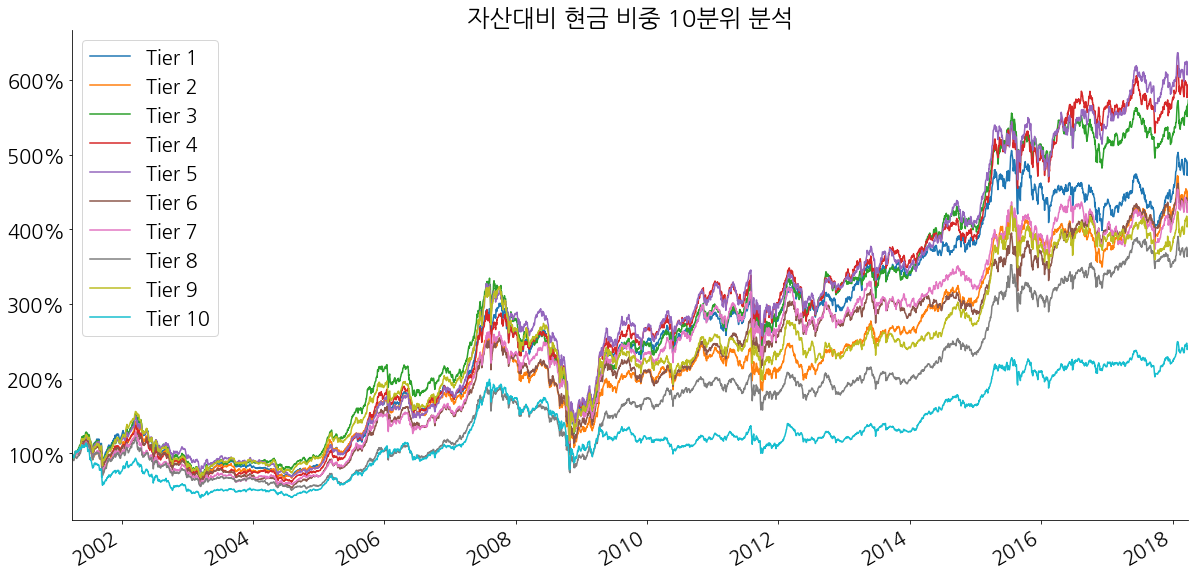

In [35]:
fig, ax = Plot().TimeSeries()
Perf_data.cumprod().plot(ax=ax)
ax.set_title('자산대비 현금 비중 10분위 분석')